## Assignment Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 
The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
 
Also, determine the optimal value of lambda for ridge and lasso regression.
 

In [1]:
# Import All the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import statsmodels Linear Regression library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import LinearRegression Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Import Library for Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read data from csv
house_df = pd.read_csv("train.csv")
house_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Check shape of the df
print (house_df.shape )   #Total 1460 rows and 81 columns

#Describe DF
house_df.describe()  #Means 38 columns are numeric


(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_df.isnull().sum()  #Check the null values in the df

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Above info confirms there is missing data in few of the column. 

In [7]:
#Check for duplicate data in rows
house_df.drop_duplicates(inplace=True)
house_df.shape

(1460, 81)

#### Above info confirms there is not any duplicate data in any rows as shape is same before and after the drop_duplicates

In [8]:
#Drop the columns with most missing values
house_df.drop([ 'Alley','PoolQC','Fence', 'MiscFeature'] ,axis=1 , inplace=True )

In [9]:
#Check unique values of FireplaceQu 
house_df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [10]:
#Final check on Missing values of columns
house_df.isnull().sum()[house_df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

#### Still there are few columns have some null values


In [11]:
#Replace Nan values with NA 
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna('NA')

In [12]:
#Check unique values of LotFrontage column
house_df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [13]:
#Impute missing values of LotFrontage column with median as this is numerical data
house_df['LotFrontage'] = house_df['LotFrontage'].fillna(house_df['LotFrontage'].median())

### Check for missing values for the remaining columns
    - MasVnrType  8 missing values. Percentage wise it is very low. Similarly MasVnrArea, BsmtQual, etc. 
    

#### Two Options are there : 
    1. Simply remove all rows having missing values
    2. Missing value imputation :
        - Fill those columns with most unique value if having string value
        - Fill those columns with median value if numerical type
        - Use fancyimpute libray and use K-Nearest Neighbor module - which finds out the similar data points and   take the average of all the points to fill in the missing values.


#### We are going with Option 1 and Option 2 

In [14]:
#Impute missing values
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(house_df.MasVnrArea.median())    

In [15]:
#Impute null values with most unique value
house_df['MasVnrType'].fillna(house_df['MasVnrType'].mode()[0] , inplace=True) 

In [16]:
#Impute Nan values of BsmtQual with NA means No Basement
house_df['BsmtQual'] = house_df['BsmtQual'].fillna('NA')

In [17]:
#Impute Nan values of BsmtQual with NA means No Basement
house_df['BsmtCond'] = house_df['BsmtCond'].fillna('NA')

In [18]:
#Impute Nan values of BsmtExposure with NA means No Basement Exposure
house_df['BsmtExposure'] = house_df['BsmtExposure'].fillna('NA')

In [19]:
#Impute Nan values of BsmtFinType1 with NA i.e. No BsmtFinType1
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].fillna('NA')

In [20]:
#Impute Nan values of BsmtFinType2 with NA i.e. No BsmtFinType2
house_df['BsmtFinType2'] = house_df['BsmtFinType2'].fillna('NA')

In [21]:
#Impute missing values of Electrical with most unique value
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])    

In [22]:
#Impute Nan values of GarageType with NA which is No Garage
house_df['GarageType'] = house_df['GarageType'].fillna('NA')

In [23]:
#Impute Nan values of GarageYrBlt with 0 i.e. No Garage
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(0)

In [24]:
#Impute Null values of GarageFinish with NA i.e. No Garage
house_df['GarageFinish'] = house_df['GarageFinish'].fillna('NA')

In [25]:
#Impute Null values of GarageQual with NA i.e. No Garage
house_df['GarageQual'] = house_df['GarageQual'].fillna('NA')

In [26]:
#Impute Null values of GarageCond with NA i.e. No Garage
house_df['GarageCond'] = house_df['GarageCond'].fillna('NA')

In [27]:
#Final check on missing values on all columns
house_df.isnull().sum()[house_df.isnull().sum()>0]  #No missing values now... we can go ahead

Series([], dtype: int64)

### More Data preprocessing ...

In [28]:
#Create new column for the house age YrSold and YearBuilt columns
house_df['HouseAge'] = house_df['YrSold'] - house_df['YearBuilt']

In [29]:
#Remove YrSold, YearBuilt as they are redundant now
house_df.drop(columns=['YrSold', 'YearBuilt'] , axis=1 , inplace=True )

In [30]:
#Convert MSSubClass into object/string type as this is columns is mapped to object type
#We can not use this columns as numerical value
house_df = house_df.astype({'MSSubClass':object})
house_df.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
HouseAge           int64
Length: 76, dtype: object

#### Convert categorical variables into numeric form in linear regression
    - using dummy variables (also known as one-hot encoding) 
    - or label encoding ( In this approach, each category of the categorical variable is assigned a numeric label. This approach assigns a unique numerical value to each category, which can be used as input in a linear regression model)

In [31]:
#Using Label Encoding to label ExterQual Po, Fa, TA, Gd, Ex -> 1,2,3,4,5
house_df = house_df.replace( {'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}} )

In [32]:
#Using Label Encoding to label BsmtQual  NA, Po, Fa, TA, Gd, Ex -> 0,1,2,3,4,5
house_df = house_df.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [33]:
#Using Label Encoding to label BsmtExposure  NA, No, Mn, Av, Gd -> 0,1,2,3,4 
house_df = house_df.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [34]:
#Using Label Encoding to label BsmtFinType1 NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ -> 0,1,2,3,4,5,6 
house_df = house_df.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [35]:
#Using Label Encoding to label HeatingQC  Po, Fa, TA, Gd, Ex -> 1,2,3,4,5
house_df = house_df.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [36]:
#Using Label Encoding to label KitchenQual Po, Fa, TA, Gd, Ex - 1,2,3,4,5
house_df = house_df.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [37]:
#Using Label Encoding to label FireplaceQu  NA, Po, Fa, TA, Gd, Ex -> 0,1,2,3,4,5
house_df = house_df.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#### More Cleaning ...

In [38]:
#Calculate the relative frequencies (or proportions) of each unique value in the column, instead of the absolute counts.
#This is to find if any column is having all most all/most repeated values
for col in house_df.columns:
    if house_df[col].dtype == np.object :
        print(col)
        print(house_df[col].value_counts(normalize=True))
        

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [39]:
#Drop columns which have more than 80% of repeated data .These will not help in analysis
house_df=house_df.drop(columns=['Street', 'LandContour', 'Utilities','Id', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
 , 'CentralAir','Heating', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
 , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType' , 'SaleCondition'])


In [40]:
house_df.info()  # No missing values + Columns remaining are 55 now. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [41]:
#Check again all columns of object type
object_type_columns = []
for col in house_df.columns:
    if house_df[col].dtype == np.object:
        object_type_columns.append(col)
print(object_type_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


#### Note we have already converted few categorical columns to numerical using label encoding.
    - Convert another set of categorical variables into numeric form using hot encoding or dummy variable

In [42]:
# Create dummy variable for MSSubClass and drop the first column from temp df using 'drop_first = True'
MSSubClass_dummy_df = pd.get_dummies(house_df['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_dummy_df with main df
house_df = pd.concat([house_df,MSSubClass_dummy_df],axis=1)
house_df.head()


# Now let's see the head of our dataframe.
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [43]:
# Drop 'MSSubClass' as we have created the dummies for it
house_df.drop(['MSSubClass'], axis = 1, inplace = True)

house_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,...,1,0,0,0,0,0,0,0,0,0
1,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,...,0,0,0,0,0,0,0,0,0,0
2,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,...,1,0,0,0,0,0,0,0,0,0
3,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,...,0,1,0,0,0,0,0,0,0,0
4,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,...,1,0,0,0,0,0,0,0,0,0


In [44]:
#Create dummy variable for MSZoning and drop the first column from temp df using 'drop_first = True'
MSZoning_dummy_df = pd.get_dummies(house_df['MSZoning'], drop_first=True, prefix='MSZoning')
MSZoning_dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [45]:
#Concat MSZoning_dummy_df with main df
house_df = pd.concat([house_df,MSZoning_dummy_df],axis=1)
house_df.head()

,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,...,0,0,0,0,0,0,0,0,1,0
1,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,...,0,0,0,0,0,0,0,0,1,0
2,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,...,0,0,0,0,0,0,0,0,1,0
3,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,...,0,0,0,0,0,0,0,0,1,0
4,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,...,0,0,0,0,0,0,0,0,1,0


In [46]:
# Drop 'MSZoning' as we have created the dummies for it
house_df.drop(['MSZoning'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,...,0,0,0,0,0,0,0,0,1,0
1,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,...,0,0,0,0,0,0,0,0,1,0
3,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,...,0,0,0,0,0,0,0,0,1,0


In [47]:
#Create dummy variable for LotShape
LotShape_dummy_df = pd.get_dummies(house_df['LotShape'], drop_first=True, prefix='LotShape')
LotShape_dummy_df.head()

,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [48]:
#Concat LotShape_dummy_df with main df
house_df = pd.concat([house_df,LotShape_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,...,0,0,0,0,0,1,0,0,0,1
1,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,...,0,0,0,0,0,1,0,0,0,1
2,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,...,0,0,0,0,0,1,0,0,0,0


In [49]:
# Drop 'LotShape' as we have created the dummies for it
house_df.drop(['LotShape'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,65.0,8450,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,...,0,0,0,0,0,1,0,0,0,1
1,80.0,9600,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,...,0,0,0,0,0,1,0,0,0,1
2,68.0,11250,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,...,0,0,0,0,0,1,0,0,0,0


In [50]:
#Create dummy variable for LotConfig
LotConfig_dummy_df = pd.get_dummies(house_df['LotConfig'],drop_first=True, prefix='LotConfig')
LotConfig_dummy_df.head()

,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,0
4,0,1,0,0


In [51]:
#Concat LotConfig_dummy_df with main df
house_df = pd.concat([house_df,LotConfig_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,65.0,8450,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,...,0,1,0,0,0,1,0,0,0,1
1,80.0,9600,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,...,0,1,0,0,0,1,0,1,0,0
2,68.0,11250,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,...,0,1,0,0,0,0,0,0,0,1
3,60.0,9550,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,...,0,1,0,0,0,0,0,1,0,0


In [52]:
# Drop 'LotConfig' as we have created the dummies for it
house_df.drop(['LotConfig'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,65.0,8450,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,...,0,1,0,0,0,1,0,0,0,1
1,80.0,9600,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,...,0,1,0,0,0,1,0,1,0,0
2,68.0,11250,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,...,0,1,0,0,0,0,0,0,0,1
3,60.0,9550,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,...,0,1,0,0,0,0,0,1,0,0


In [53]:
#Create dummy variable for Neighborhood
Neighborhood_dummy_df = pd.get_dummies(house_df['Neighborhood'], drop_first=True,  prefix='Neighborhood')
Neighborhood_dummy_df.head()


,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [54]:
#Concat Neighborhood_dummy_df with main df
house_df = pd.concat([house_df,Neighborhood_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,65.0,8450,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,...,1,0,0,0,0,0,0,0,0,0


In [55]:
# Drop 'Neighborhood' as we have created the dummies for it
house_df.drop(['Neighborhood'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,65.0,8450,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,...,1,0,0,0,0,0,0,0,0,0


In [56]:
#Create dummy variable for HouseStyle
HouseStyle_dummy_df = pd.get_dummies(house_df['HouseStyle'], drop_first=True, prefix='HouseStyle')
#concat HouseStyle_dummy_df with main df
house_df = pd.concat([house_df,HouseStyle_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,...,0,0,1,0,1,0,0,0,0,0
2,68.0,11250,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# Drop 'HouseStyle' as we have created the dummies for it
house_df.drop(['HouseStyle'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,...,0,0,1,0,1,0,0,0,0,0
2,68.0,11250,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
#Create dummy variable for RoofStyle
RoofStyle_dummy_df = pd.get_dummies(house_df['RoofStyle'], drop_first=True, prefix='RoofStyle')

#concat RoofStyle_dummy_df with main df
house_df = pd.concat([house_df,RoofStyle_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,65.0,8450,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,...,0,0,1,0,0,1,0,0,0,0
1,80.0,9600,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,...,0,0,1,0,0,1,0,0,0,0
3,60.0,9550,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,...,0,0,1,0,0,1,0,0,0,0
4,84.0,14260,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,...,0,0,1,0,0,1,0,0,0,0


In [59]:
# Drop 'RoofStyle' as we have created the dummies for it
house_df.drop(['RoofStyle'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,65.0,8450,7,5,2003,VinylSd,VinylSd,BrkFace,196.0,4,...,0,0,1,0,0,1,0,0,0,0
1,80.0,9600,6,8,1976,MetalSd,MetalSd,None,0.0,3,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,7,5,2002,VinylSd,VinylSd,BrkFace,162.0,4,...,0,0,1,0,0,1,0,0,0,0
3,60.0,9550,7,5,1970,Wd Sdng,Wd Shng,None,0.0,3,...,0,0,1,0,0,1,0,0,0,0
4,84.0,14260,8,5,2000,VinylSd,VinylSd,BrkFace,350.0,4,...,0,0,1,0,0,1,0,0,0,0


In [60]:
#Create dummy variable for Exterior1st
Exterior1st_dummy_df = pd.get_dummies(house_df['Exterior1st'], drop_first=True, prefix='Exterior1st')
 
#Concat Exterior1st_df with main df
house_df = pd.concat([house_df,Exterior1st_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,65.0,8450,7,5,2003,VinylSd,VinylSd,BrkFace,196.0,4,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,MetalSd,MetalSd,None,0.0,3,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,7,5,2002,VinylSd,VinylSd,BrkFace,162.0,4,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1970,Wd Sdng,Wd Shng,None,0.0,3,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,8,5,2000,VinylSd,VinylSd,BrkFace,350.0,4,...,0,0,0,0,0,0,0,1,0,0


In [61]:
# Drop 'Exterior1st' as we have created the dummies for it
house_df.drop(['Exterior1st'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,65.0,8450,7,5,2003,VinylSd,BrkFace,196.0,4,PConc,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,MetalSd,None,0.0,3,CBlock,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,7,5,2002,VinylSd,BrkFace,162.0,4,PConc,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1970,Wd Shng,None,0.0,3,BrkTil,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,8,5,2000,VinylSd,BrkFace,350.0,4,PConc,...,0,0,0,0,0,0,0,1,0,0


In [62]:
#Create dummy variable for Exterior2nd
Exterior2nd_dummy_df = pd.get_dummies(house_df['Exterior2nd'],drop_first=True, prefix='Exterior2nd')

#Concat Exterior2nd_df with main df
house_df = pd.concat([house_df,Exterior2nd_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,65.0,8450,7,5,2003,VinylSd,BrkFace,196.0,4,PConc,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,MetalSd,None,0.0,3,CBlock,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,7,5,2002,VinylSd,BrkFace,162.0,4,PConc,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1970,Wd Shng,None,0.0,3,BrkTil,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,2000,VinylSd,BrkFace,350.0,4,PConc,...,0,0,0,0,0,0,0,1,0,0


In [63]:
# Drop 'Exterior2nd' as we have created the dummies for it
house_df.drop(['Exterior2nd'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,65.0,8450,7,5,2003,BrkFace,196.0,4,PConc,4,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,None,0.0,3,CBlock,4,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,7,5,2002,BrkFace,162.0,4,PConc,4,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1970,None,0.0,3,BrkTil,3,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,2000,BrkFace,350.0,4,PConc,4,...,0,0,0,0,0,0,0,1,0,0


In [64]:
#Create dummy variable for MasVnrType
MasVnrType_dummy_df = pd.get_dummies(house_df['MasVnrType'],drop_first=True, prefix='MasVnrType')

#Concat MasVnrType_df with main df
house_df = pd.concat([house_df,MasVnrType_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,7,5,2003,BrkFace,196.0,4,PConc,4,...,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,6,8,1976,None,0.0,3,CBlock,4,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,2002,BrkFace,162.0,4,PConc,4,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,7,5,1970,None,0.0,3,BrkTil,3,...,0,0,0,0,0,0,1,0,1,0
4,84.0,14260,8,5,2000,BrkFace,350.0,4,PConc,4,...,0,0,0,0,1,0,0,1,0,0


In [65]:
# Drop 'MasVnrType' as we have created the dummies for it
house_df.drop(['MasVnrType'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,7,5,2003,196.0,4,PConc,4,1,...,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,6,8,1976,0.0,3,CBlock,4,4,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,2002,162.0,4,PConc,4,2,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,7,5,1970,0.0,3,BrkTil,3,1,...,0,0,0,0,0,0,1,0,1,0
4,84.0,14260,8,5,2000,350.0,4,PConc,4,3,...,0,0,0,0,1,0,0,1,0,0


In [66]:
#Create dummy variable for Foundation
Foundation_dummy_df = pd.get_dummies(house_df['Foundation'], drop_first=True, prefix='Foundation')

#Concat Foundation_dummy_df with main df
house_df = pd.concat([house_df,Foundation_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,65.0,8450,7,5,2003,196.0,4,PConc,4,1,...,0,0,1,0,0,0,1,0,0,0
1,80.0,9600,6,8,1976,0.0,3,CBlock,4,4,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,7,5,2002,162.0,4,PConc,4,2,...,0,0,1,0,0,0,1,0,0,0
3,60.0,9550,7,5,1970,0.0,3,BrkTil,3,1,...,0,1,0,1,0,0,0,0,0,0
4,84.0,14260,8,5,2000,350.0,4,PConc,4,3,...,0,0,1,0,0,0,1,0,0,0


In [67]:
# Drop 'Foundation' as we have created the dummies for it
house_df.drop(['Foundation'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,65.0,8450,7,5,2003,196.0,4,4,1,6,...,0,0,1,0,0,0,1,0,0,0
1,80.0,9600,6,8,1976,0.0,3,4,4,5,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,7,5,2002,162.0,4,4,2,6,...,0,0,1,0,0,0,1,0,0,0
3,60.0,9550,7,5,1970,0.0,3,3,1,5,...,0,1,0,1,0,0,0,0,0,0
4,84.0,14260,8,5,2000,350.0,4,4,3,6,...,0,0,1,0,0,0,1,0,0,0


In [68]:
#Create dummy variable for GarageType
GarageType_dummy_df = pd.get_dummies(house_df['GarageType'],drop_first=True, prefix='GarageType')

#Concat GarageType_df with main df
house_df = pd.concat([house_df,GarageType_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,65.0,8450,7,5,2003,196.0,4,4,1,6,...,1,0,0,0,1,0,0,0,0,0
1,80.0,9600,6,8,1976,0.0,3,4,4,5,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,2002,162.0,4,4,2,6,...,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,7,5,1970,0.0,3,3,1,5,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,8,5,2000,350.0,4,4,3,6,...,1,0,0,0,1,0,0,0,0,0


In [69]:
# Drop 'GarageType' as we have created the dummies for it
house_df.drop(['GarageType'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,65.0,8450,7,5,2003,196.0,4,4,1,6,...,1,0,0,0,1,0,0,0,0,0
1,80.0,9600,6,8,1976,0.0,3,4,4,5,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,2002,162.0,4,4,2,6,...,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,7,5,1970,0.0,3,3,1,5,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,8,5,2000,350.0,4,4,3,6,...,1,0,0,0,1,0,0,0,0,0


In [70]:
#Create dummy variable for GarageFinish
GarageFinish_dummy_df = pd.get_dummies(house_df['GarageFinish'],drop_first=True, prefix='GarageFinish')

#Concat GarageFinish_dummy_df with main df
house_df = pd.concat([house_df,GarageFinish_dummy_df],axis=1)
house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,7,5,2003,196.0,4,4,1,6,...,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,1976,0.0,3,4,4,5,...,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,2002,162.0,4,4,2,6,...,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,1970,0.0,3,3,1,5,...,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,2000,350.0,4,4,3,6,...,0,1,0,0,0,0,0,0,1,0


In [71]:
# Drop 'GarageFinish' as we have created the dummies for it
house_df.drop(['GarageFinish'], axis = 1, inplace = True)

house_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,7,5,2003,196.0,4,4,1,6,...,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,1976,0.0,3,4,4,5,...,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,2002,162.0,4,4,2,6,...,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,1970,0.0,3,3,1,5,...,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,2000,350.0,4,4,3,6,...,0,1,0,0,0,0,0,0,1,0


In [72]:
house_df.shape #Remaining columns are 149

(1460, 149)

#### Check the correaltion using heatmap

In [73]:

#sns.heatmap(house_df.corr(), annot = True , cmap="YlGnBu")
#plt.title("Correlation b/w Numerical Variables")
#plt.show()


## Splitting the Data into Training and Testing Sets

In [74]:
#Split based on 70-30 ratio in train and test data
df_train,df_test = train_test_split(house_df,train_size=0.70, random_state=100 )

print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [75]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.662096,3.593536,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.091151,2.114914,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
house_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 149 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    LotFrontage           1460 non-null   float64
 1    LotArea               1460 non-null   int64  
 2    OverallQual           1460 non-null   int64  
 3    OverallCond           1460 non-null   int64  
 4    YearRemodAdd          1460 non-null   int64  
 5    MasVnrArea            1460 non-null   float64
 6    ExterQual             1460 non-null   int64  
 7    BsmtQual              1460 non-null   int64  
 8    BsmtExposure          1460 non-null   int64  
 9    BsmtFinType1          1460 non-null   int64  
 10   BsmtFinSF1            1460 non-null   int64  
 11   BsmtFinSF2            1460 non-null   int64  
 12   BsmtUnfSF             1460 non-null   int64  
 13   TotalBsmtSF           1460 non-null   int64  
 14   HeatingQC             1460 non-null   int64  
 15   1s

### Rescaling the Features 

We will use StandardScaler scaling.

In [77]:
#Instantiate the StandardScaler object
standard_scaler = StandardScaler()

#create list of columns numeric variables except dummy' variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit and transform on training on data
df_train[num_vars] = standard_scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.143653,1.138412,...,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.607084,-0.753845,...,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.607084,-1.226909,...,0,1,0,0,0,0,0,0,0,1
1416,-0.433386,0.082504,-1.496155,0.384025,-1.698692,-0.558025,-0.699764,-0.533302,-0.607084,-1.226909,...,0,0,0,0,0,1,0,0,0,1
390,-0.886290,-0.202365,-0.781333,2.216221,-1.698692,-0.558025,-0.699764,-0.533302,-0.607084,-0.280781,...,0,0,0,0,0,1,0,0,0,1


In [78]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-2.370506e-17,-9.108912e-17,-2.217184e-16,1.241797e-16,-8.375061e-16,-9.416779e-17,4.334328e-16,2.710858e-16,-3.477466e-16,1.346186e-16,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-1.523996e+00,-1.699973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.070840e-01,-1.226909e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.070840e-01,1.922837e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.226741e+00,1.138412e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.102509e+01,1.987332e+01,2.792775e+00,3.132319e+00,1.214656e+00,7.986733e+00,2.802485e+00,1.689151e+00,2.143653e+00,1.138412e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [79]:
 
#SalePrice is our Target Variable
y_train = df_train.pop('SalePrice')
X_train = df_train


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [80]:
#Applying RFE with the 35 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 78),
 ('LotArea', False, 104),
 ('OverallQual', True, 1),
 ('OverallCond', False, 51),
 ('YearRemodAdd', False, 110),
 ('MasVnrArea', False, 81),
 ('ExterQual', False, 36),
 ('BsmtQual', False, 5),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 101),
 ('BsmtFinSF1', False, 18),
 ('BsmtFinSF2', False, 21),
 ('BsmtUnfSF', False, 15),
 ('TotalBsmtSF', False, 19),
 ('HeatingQC', False, 113),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 20),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 23),
 ('BsmtHalfBath', False, 97),
 ('FullBath', False, 53),
 ('HalfBath', False, 93),
 ('BedroomAbvGr', False, 58),
 ('KitchenAbvGr', False, 17),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 85),
 ('Fireplaces', False, 55),
 ('FireplaceQu', False, 94),
 ('GarageYrBlt', False, 12),
 ('GarageCars', False, 2),
 ('GarageArea', False, 82),
 ('WoodDeckSF', False, 74),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', False, 86),
 ('3SsnPorch', Fa

In [82]:
#Filter the columns from rfe
col = X_train.columns[rfe.support_]
col

## Skipped Columns
#X_train.columns[~rfe.support_]

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenQual', 'MSSubClass_120', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Wd Shng', 'GarageType_CarPort',
       'GarageFinish_NA'],
      dtype='object')

### Build the model using statsmodel.
    -This is done for the detailed statistic

In [83]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [84]:
#Adding a constant variable in sm
X_train_rfe = sm.add_constant(X_train_rfe)


In [85]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit() 


In [86]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:31   Log-Likelihood:                -12053.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                     985   BIC:                         2.435e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.336e+05   1.31e+04     10.216      0.000    1.08e+05    1.59e+05
OverallQual           2.317e+04   1782.432     12.999      0.000    1.97e+04    2.67e+04
BsmtExposure          1.338e+04   1218.002     10.987      0.000     1.1e+04    1.58e+04
1stFlrSF              1.269e+04   1.02e+04      1.244      0.214   -7326.605    3.27e+04
2ndFlrSF              2.298e+04   1.09e+04      2.104      0.036    1543.706    4.44e+04
GrLivArea             1.105e+04   1.34e+04      0.825      0.410   -1.53e+04    3.74e+04
KitchenQual           1.099e+04   1467.828      7.490      0.000    8113.940    1.39e+04
MSSubClass_120       -2.105e+04   4856.177     -4.335      0.000   -3.06e+04   -1.15e+04
MSZoning_FV           1.777e+04   1.64e+04      1.086      0.278   -1.43e+04    4.99e+04
MSZoning_RH            2.34e+04   1.58e+04      1.479      0.140   -7650.827    5.44e+04
MSZoning_RL           3.158e+04    1.3e+04      2.439      0.015    6168.089     5.7e+04
MSZoning_RM           1.839e+04   1.31e+04      1.402      0.161   -7346.437    4.41e+04
LotShape_IR3         -1.707e+04   1.13e+04     -1.515      0.130   -3.92e+04    5045.819
LotConfig_CulDSac     1.489e+04   4383.199      3.396      0.001    6283.769    2.35e+04
Neighborhood_ClearCr  1.262e+04   7756.790      1.627      0.104   -2604.128    2.78e+04
Neighborhood_Crawfor  2.861e+04   6149.379      4.653      0.000    1.65e+04    4.07e+04
Neighborhood_NoRidge  6.288e+04   6475.361      9.711      0.000    5.02e+04    7.56e+04
Neighborhood_NridgHt  5.467e+04   5264.483     10.384      0.000    4.43e+04     6.5e+04
Neighborhood_Somerst  3.004e+04   9013.058      3.333      0.001    1.24e+04    4.77e+04
Neighborhood_StoneBr  2.883e+04   9924.000      2.905      0.004    9358.646    4.83e+04
Neighborhood_Veenker  3.083e+04   1.02e+04      3.015      0.003    1.08e+04    5.09e+04
HouseStyle_1.5Unf     1.159e+04   9900.272      1.171      0.242   -7834.167     3.1e+04
HouseStyle_1Story     2.777e+04   3963.592      7.006      0.000       2e+04    3.55e+04
HouseStyle_2.5Fin    -2.495e+04   1.96e+04     -1.276      0.202   -6.33e+04    1.34e+04
HouseStyle_2Story    -8151.1383   4149.032     -1.965      0.050   -1.63e+04      -9.180
Exterior1st_AsphShn  -3.859e+04   3.35e+04     -1.154      0.249   -1.04e+05    2.71e+04
Exterior1st_BrkComm  -2.764e+04   2.35e+04     -1.177      0.239   -7.37e+04    1.84e+04
Exterior1st_CemntBd  -2.858e+04   2.39e+04     -1.194      0.233   -7.55e+04    1.84e+04
Exterior1st_ImStucc  -4.007e+04   3.59e+04     -1.118      0.264    -1.1e+05    3.03e+04
Exterior1st_Stone    -2.149e+04   2.39e+04     -0.901      0.368   -6.83e+04    2.53e+04
Exterior1st_Stucco   -2.403e+04   7749.324     -3.101      0.002   -3.92e+04   -8825.242
Exterior2nd_CmentBd    3.89e+04    2.4e+04      1.622    

#### Check the R2 and Adjusted R2 above

#### Generate the VIF

In [87]:
#Check VIF of the RFE model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,GrLivArea,168.63
0,const,160.48
4,2ndFlrSF,112.03
3,1stFlrSF,97.62
10,MSZoning_RL,26.52
11,MSZoning_RM,20.68
31,Exterior2nd_CmentBd,18.85
27,Exterior1st_CemntBd,18.77
8,MSZoning_FV,10.59
18,Neighborhood_Somerst,4.22


#### GrLivAreaFin has higher p-value and VIF , lets drop this. 

In [88]:
X_train_new = X_train_rfe.drop(['GrLivArea'],axis=1)

#### Rebuild the model ..

In [89]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [90]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [91]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     143.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:31   Log-Likelihood:                -12053.
No. Observations:                1021   AIC:                         2.418e+04
Df Residuals:                     986   BIC:                         2.435e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.352e+05   1.29e+04     10.452      0.000     1.1e+05    1.61e+05
OverallQual           2.323e+04   1780.564     13.047      0.000    1.97e+04    2.67e+04
BsmtExposure          1.327e+04   1210.489     10.965      0.000    1.09e+04    1.56e+04
1stFlrSF                2.1e+04   1520.706     13.810      0.000     1.8e+04     2.4e+04
2ndFlrSF              3.175e+04   2489.360     12.755      0.000    2.69e+04    3.66e+04
KitchenQual             1.1e+04   1467.553      7.497      0.000    8122.985    1.39e+04
MSSubClass_120       -2.105e+04   4855.385     -4.334      0.000   -3.06e+04   -1.15e+04
MSZoning_FV           1.643e+04   1.63e+04      1.009      0.313   -1.55e+04    4.84e+04
MSZoning_RH           2.212e+04   1.57e+04      1.405      0.160   -8777.286     5.3e+04
MSZoning_RL           3.024e+04   1.28e+04      2.354      0.019    5030.046    5.54e+04
MSZoning_RM            1.71e+04    1.3e+04      1.314      0.189   -8446.755    4.27e+04
LotShape_IR3         -1.705e+04   1.13e+04     -1.513      0.131   -3.92e+04    5068.609
LotConfig_CulDSac     1.479e+04   4380.889      3.375      0.001    6190.715    2.34e+04
Neighborhood_ClearCr  1.315e+04   7728.134      1.702      0.089   -2010.790    2.83e+04
Neighborhood_Crawfor  2.862e+04   6148.380      4.654      0.000    1.65e+04    4.07e+04
Neighborhood_NoRidge  6.297e+04   6473.482      9.727      0.000    5.03e+04    7.57e+04
Neighborhood_NridgHt  5.466e+04   5263.616     10.384      0.000    4.43e+04     6.5e+04
Neighborhood_Somerst   3.01e+04   9011.370      3.340      0.001    1.24e+04    4.78e+04
Neighborhood_StoneBr  2.895e+04   9921.449      2.918      0.004    9476.298    4.84e+04
Neighborhood_Veenker  3.089e+04   1.02e+04      3.020      0.003    1.08e+04     5.1e+04
HouseStyle_1.5Unf     1.082e+04   9853.793      1.098      0.273   -8519.282    3.02e+04
HouseStyle_1Story     2.715e+04   3890.384      6.978      0.000    1.95e+04    3.48e+04
HouseStyle_2.5Fin    -1.778e+04   1.75e+04     -1.015      0.310   -5.21e+04    1.66e+04
HouseStyle_2Story    -8173.0095   4148.273     -1.970      0.049   -1.63e+04     -32.550
Exterior1st_AsphShn  -3.947e+04   3.34e+04     -1.181      0.238   -1.05e+05    2.61e+04
Exterior1st_BrkComm   -2.76e+04   2.35e+04     -1.176      0.240   -7.37e+04    1.85e+04
Exterior1st_CemntBd  -2.861e+04   2.39e+04     -1.196      0.232   -7.56e+04    1.83e+04
Exterior1st_ImStucc  -4.026e+04   3.58e+04     -1.123      0.262   -1.11e+05    3.01e+04
Exterior1st_Stone    -2.161e+04   2.38e+04     -0.906      0.365   -6.84e+04    2.52e+04
Exterior1st_Stucco   -2.366e+04   7734.555     -3.058      0.002   -3.88e+04   -8477.080
Exterior2nd_CmentBd   3.853e+04    2.4e+04      1.607      0.108   -8519.030    8.56e+04
Exterior2nd_ImStucc   1.598e+04   1.26e+04      1.264    

#### Exterior1st_Stone has higher p-value , lets drop this. 

In [92]:
X_train_new = X_train_new.drop(['Exterior1st_Stone'],axis=1)

#### Rebuild the model ..

In [93]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [94]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [95]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:31   Log-Likelihood:                -12053.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     987   BIC:                         2.434e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.35e+05   1.29e+04     10.442      0.000     1.1e+05     1.6e+05
OverallQual           2.328e+04   1779.442     13.086      0.000    1.98e+04    2.68e+04
BsmtExposure           1.33e+04   1210.079     10.989      0.000    1.09e+04    1.57e+04
1stFlrSF              2.083e+04   1508.397     13.807      0.000    1.79e+04    2.38e+04
2ndFlrSF              3.182e+04   2488.083     12.788      0.000    2.69e+04    3.67e+04
KitchenQual           1.092e+04   1464.844      7.458      0.000    8049.565    1.38e+04
MSSubClass_120       -2.095e+04   4853.696     -4.315      0.000   -3.05e+04   -1.14e+04
MSZoning_FV           1.634e+04   1.63e+04      1.004      0.316   -1.56e+04    4.83e+04
MSZoning_RH           2.223e+04   1.57e+04      1.412      0.158   -8657.449    5.31e+04
MSZoning_RL           3.034e+04   1.28e+04      2.362      0.018    5137.235    5.55e+04
MSZoning_RM           1.713e+04    1.3e+04      1.316      0.189   -8420.111    4.27e+04
LotShape_IR3         -1.685e+04   1.13e+04     -1.496      0.135    -3.9e+04    5257.973
LotConfig_CulDSac     1.485e+04   4379.988      3.390      0.001    6252.652    2.34e+04
Neighborhood_ClearCr  1.325e+04   7726.740      1.715      0.087   -1914.353    2.84e+04
Neighborhood_Crawfor  2.799e+04   6109.450      4.582      0.000     1.6e+04       4e+04
Neighborhood_NoRidge  6.314e+04   6470.252      9.758      0.000    5.04e+04    7.58e+04
Neighborhood_NridgHt  5.487e+04   5257.930     10.436      0.000    4.46e+04    6.52e+04
Neighborhood_Somerst  3.028e+04   9008.274      3.361      0.001    1.26e+04     4.8e+04
Neighborhood_StoneBr    2.9e+04   9920.371      2.923      0.004    9532.117    4.85e+04
Neighborhood_Veenker  3.099e+04   1.02e+04      3.031      0.003    1.09e+04    5.11e+04
HouseStyle_1.5Unf     1.089e+04   9852.552      1.106      0.269   -8442.023    3.02e+04
HouseStyle_1Story      2.72e+04   3889.553      6.994      0.000    1.96e+04    3.48e+04
HouseStyle_2.5Fin    -1.766e+04   1.75e+04     -1.008      0.314    -5.2e+04    1.67e+04
HouseStyle_2Story    -8279.1039   4146.243     -1.997      0.046   -1.64e+04    -142.639
Exterior1st_AsphShn  -3.913e+04   3.34e+04     -1.171      0.242   -1.05e+05    2.65e+04
Exterior1st_BrkComm   -2.76e+04   2.35e+04     -1.176      0.240   -7.37e+04    1.85e+04
Exterior1st_CemntBd  -2.856e+04   2.39e+04     -1.194      0.233   -7.55e+04    1.84e+04
Exterior1st_ImStucc  -4.024e+04   3.58e+04     -1.123      0.262   -1.11e+05    3.01e+04
Exterior1st_Stucco   -2.346e+04   7730.824     -3.034      0.002   -3.86e+04   -8288.345
Exterior2nd_CmentBd   3.866e+04    2.4e+04      1.613      0.107   -8385.030    8.57e+04
Exterior2nd_ImStucc   1.605e+04   1.26e+04      1.270      0.204   -8751.945    4.08e+04
Exterior2nd_Wd Shng  -1.821e+04   6069.028     -3.001    

#### MSZoning_FV has higher p-value , lets drop this. 

In [96]:
X_train_new = X_train_new.drop(['MSZoning_FV'],axis=1)

#### Rebuild the model ..

In [97]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [98]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [99]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:31   Log-Likelihood:                -12054.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     988   BIC:                         2.434e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.45e+05   8288.884     17.490      0.000    1.29e+05    1.61e+05
OverallQual           2.336e+04   1778.002     13.137      0.000    1.99e+04    2.68e+04
BsmtExposure          1.324e+04   1208.751     10.953      0.000    1.09e+04    1.56e+04
1stFlrSF               2.08e+04   1508.130     13.791      0.000    1.78e+04    2.38e+04
2ndFlrSF              3.167e+04   2483.529     12.751      0.000    2.68e+04    3.65e+04
KitchenQual           1.094e+04   1464.766      7.469      0.000    8065.423    1.38e+04
MSSubClass_120       -2.078e+04   4850.886     -4.284      0.000   -3.03e+04   -1.13e+04
MSZoning_RH           1.224e+04   1.22e+04      1.004      0.316   -1.17e+04    3.62e+04
MSZoning_RL           2.024e+04   7980.855      2.536      0.011    4578.316    3.59e+04
MSZoning_RM           7104.1989   8353.628      0.850      0.395   -9288.693    2.35e+04
LotShape_IR3         -1.674e+04   1.13e+04     -1.486      0.138   -3.88e+04    5371.051
LotConfig_CulDSac      1.46e+04   4372.900      3.338      0.001    6016.241    2.32e+04
Neighborhood_ClearCr  1.348e+04   7723.204      1.746      0.081   -1671.750    2.86e+04
Neighborhood_Crawfor  2.801e+04   6109.455      4.585      0.000     1.6e+04       4e+04
Neighborhood_NoRidge  6.315e+04   6470.252      9.761      0.000    5.05e+04    7.59e+04
Neighborhood_NridgHt  5.481e+04   5257.603     10.425      0.000    4.45e+04    6.51e+04
Neighborhood_Somerst  3.488e+04   7755.801      4.497      0.000    1.97e+04    5.01e+04
Neighborhood_StoneBr  2.901e+04   9920.401      2.925      0.004    9545.151    4.85e+04
Neighborhood_Veenker  3.114e+04   1.02e+04      3.046      0.002    1.11e+04    5.12e+04
HouseStyle_1.5Unf     1.092e+04   9852.558      1.108      0.268   -8416.562    3.03e+04
HouseStyle_1Story     2.711e+04   3888.599      6.973      0.000    1.95e+04    3.47e+04
HouseStyle_2.5Fin    -1.714e+04   1.75e+04     -0.980      0.328   -5.15e+04    1.72e+04
HouseStyle_2Story    -7840.9475   4123.221     -1.902      0.058   -1.59e+04     250.330
Exterior1st_AsphShn  -3.874e+04   3.34e+04     -1.159      0.247   -1.04e+05    2.69e+04
Exterior1st_BrkComm  -2.742e+04   2.35e+04     -1.168      0.243   -7.35e+04    1.86e+04
Exterior1st_CemntBd   -2.86e+04   2.39e+04     -1.196      0.232   -7.56e+04    1.83e+04
Exterior1st_ImStucc  -4.032e+04   3.58e+04     -1.125      0.261   -1.11e+05       3e+04
Exterior1st_Stucco   -2.341e+04   7730.710     -3.028      0.003   -3.86e+04   -8241.320
Exterior2nd_CmentBd   3.851e+04    2.4e+04      1.606      0.109   -8532.785    8.55e+04
Exterior2nd_ImStucc    1.61e+04   1.26e+04      1.274      0.203   -8699.762    4.09e+04
Exterior2nd_Wd Shng  -1.819e+04   6069.016     -2.998      0.003   -3.01e+04   -6283.992
GarageType_CarPort   -1.472e+04   1.27e+04     -1.161    

#### MSZoning_RM has higher p-value , lets drop this. 

In [100]:
X_train_new = X_train_new.drop(['MSZoning_RM'],axis=1)

#### Rebuild the model ..

In [101]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [102]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [103]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:31   Log-Likelihood:                -12054.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     989   BIC:                         2.433e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.514e+05   3440.233     44.004      0.000    1.45e+05    1.58e+05
OverallQual           2.344e+04   1775.033     13.206      0.000       2e+04    2.69e+04
BsmtExposure          1.321e+04   1207.991     10.934      0.000    1.08e+04    1.56e+04
1stFlrSF              2.082e+04   1507.781     13.806      0.000    1.79e+04    2.38e+04
2ndFlrSF              3.162e+04   2482.430     12.736      0.000    2.67e+04    3.65e+04
KitchenQual           1.096e+04   1464.420      7.482      0.000    8083.414    1.38e+04
MSSubClass_120       -2.078e+04   4850.207     -4.284      0.000   -3.03e+04   -1.13e+04
MSZoning_RH           5940.3075   9685.289      0.613      0.540   -1.31e+04    2.49e+04
MSZoning_RL           1.397e+04   3062.620      4.562      0.000    7962.317       2e+04
LotShape_IR3         -1.681e+04   1.13e+04     -1.492      0.136   -3.89e+04    5293.387
LotConfig_CulDSac     1.481e+04   4365.060      3.393      0.001    6245.396    2.34e+04
Neighborhood_ClearCr  1.337e+04   7720.902      1.731      0.084   -1784.024    2.85e+04
Neighborhood_Crawfor  2.788e+04   6106.774      4.566      0.000    1.59e+04    3.99e+04
Neighborhood_NoRidge  6.298e+04   6466.130      9.740      0.000    5.03e+04    7.57e+04
Neighborhood_NridgHt  5.453e+04   5246.245     10.393      0.000    4.42e+04    6.48e+04
Neighborhood_Somerst  2.995e+04   5150.252      5.815      0.000    1.98e+04    4.01e+04
Neighborhood_StoneBr   2.86e+04   9907.281      2.887      0.004    9160.719     4.8e+04
Neighborhood_Veenker  3.091e+04   1.02e+04      3.025      0.003    1.09e+04     5.1e+04
HouseStyle_1.5Unf     1.118e+04   9846.287      1.136      0.256   -8140.207    3.05e+04
HouseStyle_1Story     2.707e+04   3887.661      6.963      0.000    1.94e+04    3.47e+04
HouseStyle_2.5Fin    -1.705e+04   1.75e+04     -0.974      0.330   -5.14e+04    1.73e+04
HouseStyle_2Story    -7927.8350   4121.379     -1.924      0.055    -1.6e+04     159.816
Exterior1st_AsphShn  -3.881e+04   3.34e+04     -1.161      0.246   -1.04e+05    2.68e+04
Exterior1st_BrkComm  -2.744e+04   2.35e+04     -1.169      0.243   -7.35e+04    1.86e+04
Exterior1st_CemntBd  -2.815e+04   2.39e+04     -1.177      0.239   -7.51e+04    1.88e+04
Exterior1st_ImStucc  -4.053e+04   3.58e+04     -1.131      0.258   -1.11e+05    2.98e+04
Exterior1st_Stucco   -2.326e+04   7727.434     -3.009      0.003   -3.84e+04   -8091.126
Exterior2nd_CmentBd   3.858e+04    2.4e+04      1.610      0.108   -8457.255    8.56e+04
Exterior2nd_ImStucc   1.617e+04   1.26e+04      1.280      0.201   -8620.164     4.1e+04
Exterior2nd_Wd Shng  -1.798e+04   6063.086     -2.966      0.003   -2.99e+04   -6084.489
GarageType_CarPort   -1.549e+04   1.26e+04     -1.224      0.221   -4.03e+04    9334.459
GarageFinish_NA      -7646.6101   4795.412     -1.595    

#### MSZoning_RH has higher p-value , lets drop this. 

In [104]:
X_train_new = X_train_new.drop(['MSZoning_RH'],axis=1)

#### Rebuild the model ..

In [105]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [106]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [107]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     162.8
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12054.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     990   BIC:                         2.432e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.517e+05   3394.552     44.696      0.000    1.45e+05    1.58e+05
OverallQual           2.343e+04   1774.322     13.203      0.000    1.99e+04    2.69e+04
BsmtExposure          1.321e+04   1207.595     10.940      0.000    1.08e+04    1.56e+04
1stFlrSF              2.087e+04   1504.222     13.878      0.000    1.79e+04    2.38e+04
2ndFlrSF              3.165e+04   2480.819     12.760      0.000    2.68e+04    3.65e+04
KitchenQual           1.092e+04   1462.960      7.467      0.000    8053.123    1.38e+04
MSSubClass_120       -2.067e+04   4845.550     -4.266      0.000   -3.02e+04   -1.12e+04
MSZoning_RL           1.355e+04   2983.967      4.542      0.000    7696.205    1.94e+04
LotShape_IR3         -1.692e+04   1.13e+04     -1.503      0.133    -3.9e+04    5175.070
LotConfig_CulDSac     1.483e+04   4363.575      3.399      0.001    6267.292    2.34e+04
Neighborhood_ClearCr  1.333e+04   7718.249      1.727      0.084   -1814.583    2.85e+04
Neighborhood_Crawfor    2.8e+04   6101.878      4.589      0.000     1.6e+04       4e+04
Neighborhood_NoRidge  6.292e+04   6463.313      9.735      0.000    5.02e+04    7.56e+04
Neighborhood_NridgHt  5.452e+04   5244.590     10.396      0.000    4.42e+04    6.48e+04
Neighborhood_Somerst  2.969e+04   5131.481      5.786      0.000    1.96e+04    3.98e+04
Neighborhood_StoneBr   2.86e+04   9904.154      2.887      0.004    9160.826     4.8e+04
Neighborhood_Veenker  3.089e+04   1.02e+04      3.024      0.003    1.08e+04    5.09e+04
HouseStyle_1.5Unf     1.148e+04   9831.430      1.167      0.243   -7815.982    3.08e+04
HouseStyle_1Story     2.716e+04   3883.308      6.995      0.000    1.95e+04    3.48e+04
HouseStyle_2.5Fin    -1.586e+04   1.74e+04     -0.912      0.362      -5e+04    1.83e+04
HouseStyle_2Story    -7857.4124   4118.481     -1.908      0.057   -1.59e+04     224.542
Exterior1st_AsphShn  -3.917e+04   3.34e+04     -1.173      0.241   -1.05e+05    2.64e+04
Exterior1st_BrkComm  -2.748e+04   2.35e+04     -1.171      0.242   -7.35e+04    1.86e+04
Exterior1st_CemntBd  -2.837e+04   2.39e+04     -1.187      0.236   -7.53e+04    1.85e+04
Exterior1st_ImStucc  -4.041e+04   3.58e+04     -1.128      0.260   -1.11e+05    2.99e+04
Exterior1st_Stucco   -2.341e+04   7720.818     -3.032      0.002   -3.86e+04   -8260.042
Exterior2nd_CmentBd   3.855e+04    2.4e+04      1.609      0.108   -8464.841    8.56e+04
Exterior2nd_ImStucc   1.612e+04   1.26e+04      1.276      0.202   -8669.960    4.09e+04
Exterior2nd_Wd Shng   -1.81e+04   6058.159     -2.988      0.003      -3e+04   -6211.482
GarageType_CarPort   -1.562e+04   1.26e+04     -1.236      0.217   -4.04e+04    9186.730
GarageFinish_NA      -7371.4291   4772.872     -1.544      0.123   -1.67e+04    1994.679
=========================================================

#### HouseStyle_2.5Fin  has higher p-value , lets drop this. 

In [108]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Fin'],axis=1)

#### Rebuild the model ..

In [109]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [110]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [111]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12055.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     991   BIC:                         2.432e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.515e+05   3383.311     44.771      0.000    1.45e+05    1.58e+05
OverallQual           2.347e+04   1773.492     13.234      0.000       2e+04     2.7e+04
BsmtExposure           1.32e+04   1207.458     10.935      0.000    1.08e+04    1.56e+04
1stFlrSF              2.081e+04   1502.150     13.850      0.000    1.79e+04    2.38e+04
2ndFlrSF               3.11e+04   2404.861     12.932      0.000    2.64e+04    3.58e+04
KitchenQual           1.099e+04   1460.916      7.524      0.000    8125.512    1.39e+04
MSSubClass_120       -2.072e+04   4844.865     -4.276      0.000   -3.02e+04   -1.12e+04
MSZoning_RL           1.362e+04   2982.738      4.567      0.000    7768.263    1.95e+04
LotShape_IR3         -1.683e+04   1.13e+04     -1.495      0.135   -3.89e+04    5263.014
LotConfig_CulDSac     1.482e+04   4363.186      3.396      0.001    6256.144    2.34e+04
Neighborhood_ClearCr  1.345e+04   7716.501      1.743      0.082   -1692.567    2.86e+04
Neighborhood_Crawfor  2.766e+04   6089.850      4.541      0.000    1.57e+04    3.96e+04
Neighborhood_NoRidge  6.328e+04   6450.459      9.810      0.000    5.06e+04    7.59e+04
Neighborhood_NridgHt  5.446e+04   5243.646     10.385      0.000    4.42e+04    6.47e+04
Neighborhood_Somerst  2.962e+04   5130.515      5.774      0.000    1.96e+04    3.97e+04
Neighborhood_StoneBr  2.868e+04   9902.926      2.896      0.004    9243.440    4.81e+04
Neighborhood_Veenker  3.087e+04   1.02e+04      3.022      0.003    1.08e+04    5.09e+04
HouseStyle_1.5Unf     1.131e+04   9828.960      1.151      0.250   -7974.826    3.06e+04
HouseStyle_1Story     2.697e+04   3877.250      6.956      0.000    1.94e+04    3.46e+04
HouseStyle_2Story    -7045.0175   4020.718     -1.752      0.080   -1.49e+04     845.082
Exterior1st_AsphShn  -3.891e+04   3.34e+04     -1.165      0.244   -1.04e+05    2.66e+04
Exterior1st_BrkComm   -2.74e+04   2.35e+04     -1.168      0.243   -7.34e+04    1.86e+04
Exterior1st_CemntBd  -2.829e+04   2.39e+04     -1.184      0.237   -7.52e+04    1.86e+04
Exterior1st_ImStucc   -4.09e+04   3.58e+04     -1.142      0.254   -1.11e+05    2.94e+04
Exterior1st_Stucco   -2.311e+04   7713.203     -2.996      0.003   -3.82e+04   -7975.935
Exterior2nd_CmentBd   3.813e+04    2.4e+04      1.592      0.112   -8876.693    8.51e+04
Exterior2nd_ImStucc   1.614e+04   1.26e+04      1.278      0.201   -8640.642    4.09e+04
Exterior2nd_Wd Shng  -1.799e+04   6056.420     -2.970      0.003   -2.99e+04   -6103.706
GarageType_CarPort   -1.554e+04   1.26e+04     -1.229      0.219   -4.03e+04    9271.465
GarageFinish_NA      -7537.5915   4768.992     -1.581      0.114   -1.69e+04    1820.891
==============================================================================
Omnibus:                      277.963   Durbin-Watson:             

#### Exterior1st_ImStucc has higher p-value , lets drop this. 

In [112]:
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'],axis=1)

#### Rebuild the model ..

In [113]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [114]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [115]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     992   BIC:                         2.431e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.515e+05   3383.827     44.763      0.000    1.45e+05    1.58e+05
OverallQual           2.337e+04   1771.607     13.192      0.000    1.99e+04    2.68e+04
BsmtExposure           1.33e+04   1204.591     11.042      0.000    1.09e+04    1.57e+04
1stFlrSF              2.085e+04   1501.952     13.879      0.000    1.79e+04    2.38e+04
2ndFlrSF              3.127e+04   2400.766     13.024      0.000    2.66e+04     3.6e+04
KitchenQual             1.1e+04   1461.119      7.529      0.000    8134.004    1.39e+04
MSSubClass_120       -2.053e+04   4842.957     -4.240      0.000      -3e+04    -1.1e+04
MSZoning_RL           1.364e+04   2983.129      4.574      0.000    7790.353    1.95e+04
LotShape_IR3         -1.698e+04   1.13e+04     -1.508      0.132   -3.91e+04    5111.623
LotConfig_CulDSac     1.486e+04   4363.677      3.406      0.001    6300.256    2.34e+04
Neighborhood_ClearCr  1.349e+04   7717.602      1.748      0.081   -1653.865    2.86e+04
Neighborhood_Crawfor  2.757e+04   6090.298      4.527      0.000    1.56e+04    3.95e+04
Neighborhood_NoRidge   6.22e+04   6381.002      9.747      0.000    4.97e+04    7.47e+04
Neighborhood_NridgHt  5.443e+04   5244.387     10.378      0.000    4.41e+04    6.47e+04
Neighborhood_Somerst  2.966e+04   5131.220      5.780      0.000    1.96e+04    3.97e+04
Neighborhood_StoneBr  2.859e+04   9904.167      2.887      0.004    9156.345     4.8e+04
Neighborhood_Veenker  3.075e+04   1.02e+04      3.010      0.003    1.07e+04    5.08e+04
HouseStyle_1.5Unf      1.15e+04   9829.139      1.170      0.242   -7790.623    3.08e+04
HouseStyle_1Story     2.702e+04   3877.648      6.967      0.000    1.94e+04    3.46e+04
HouseStyle_2Story    -7060.3095   4021.313     -1.756      0.079    -1.5e+04     830.946
Exterior1st_AsphShn  -3.876e+04   3.34e+04     -1.160      0.246   -1.04e+05    2.68e+04
Exterior1st_BrkComm  -2.735e+04   2.35e+04     -1.166      0.244   -7.34e+04    1.87e+04
Exterior1st_CemntBd   -2.83e+04   2.39e+04     -1.184      0.237   -7.52e+04    1.86e+04
Exterior1st_Stucco   -2.316e+04   7714.251     -3.003      0.003   -3.83e+04   -8025.909
Exterior2nd_CmentBd    3.81e+04    2.4e+04      1.590      0.112   -8912.357    8.51e+04
Exterior2nd_ImStucc   1.117e+04   1.19e+04      0.942      0.347   -1.21e+04    3.44e+04
Exterior2nd_Wd Shng  -1.799e+04   6057.346     -2.971      0.003   -2.99e+04   -6108.158
GarageType_CarPort   -1.566e+04   1.26e+04     -1.238      0.216   -4.05e+04    9152.331
GarageFinish_NA      -7592.8715   4769.478     -1.592      0.112    -1.7e+04    1766.553
==============================================================================
Omnibus:                      277.328   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16736.92

#### Exterior1st_AsphShn has higher p-value , lets drop this. 

In [116]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

#### Rebuild the model ..

In [117]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [118]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [119]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12056.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     993   BIC:                         2.431e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.515e+05   3384.280     44.767      0.000    1.45e+05    1.58e+05
OverallQual           2.337e+04   1771.912     13.188      0.000    1.99e+04    2.68e+04
BsmtExposure          1.339e+04   1202.601     11.131      0.000     1.1e+04    1.57e+04
1stFlrSF              2.074e+04   1499.193     13.831      0.000    1.78e+04    2.37e+04
2ndFlrSF              3.132e+04   2400.746     13.046      0.000    2.66e+04     3.6e+04
KitchenQual           1.102e+04   1461.316      7.539      0.000    8148.674    1.39e+04
MSSubClass_120       -2.056e+04   4843.762     -4.244      0.000   -3.01e+04   -1.11e+04
MSZoning_RL           1.359e+04   2983.341      4.557      0.000    7740.291    1.94e+04
LotShape_IR3         -1.691e+04   1.13e+04     -1.502      0.133    -3.9e+04    5186.857
LotConfig_CulDSac     1.488e+04   4364.410      3.410      0.001    6316.690    2.34e+04
Neighborhood_ClearCr  1.349e+04   7718.946      1.748      0.081   -1655.151    2.86e+04
Neighborhood_Crawfor   2.76e+04   6091.314      4.530      0.000    1.56e+04    3.95e+04
Neighborhood_NoRidge  6.228e+04   6381.746      9.758      0.000    4.98e+04    7.48e+04
Neighborhood_NridgHt  5.449e+04   5244.980     10.390      0.000    4.42e+04    6.48e+04
Neighborhood_Somerst  2.963e+04   5132.075      5.774      0.000    1.96e+04    3.97e+04
Neighborhood_StoneBr  2.862e+04   9905.862      2.889      0.004    9181.746    4.81e+04
Neighborhood_Veenker  3.074e+04   1.02e+04      3.009      0.003    1.07e+04    5.08e+04
HouseStyle_1.5Unf     1.166e+04   9829.859      1.186      0.236   -7629.986    3.09e+04
HouseStyle_1Story     2.705e+04   3878.179      6.976      0.000    1.94e+04    3.47e+04
HouseStyle_2Story    -7152.0822   4021.235     -1.779      0.076    -1.5e+04     739.012
Exterior1st_BrkComm  -2.725e+04   2.35e+04     -1.161      0.246   -7.33e+04    1.88e+04
Exterior1st_CemntBd  -2.816e+04   2.39e+04     -1.178      0.239   -7.51e+04    1.88e+04
Exterior1st_Stucco   -2.308e+04   7715.267     -2.992      0.003   -3.82e+04   -7941.407
Exterior2nd_CmentBd   3.805e+04    2.4e+04      1.588      0.113   -8967.606    8.51e+04
Exterior2nd_ImStucc   1.114e+04   1.19e+04      0.939      0.348   -1.21e+04    3.44e+04
Exterior2nd_Wd Shng  -1.795e+04   6058.260     -2.962      0.003   -2.98e+04   -6058.330
GarageType_CarPort   -1.564e+04   1.26e+04     -1.237      0.216   -4.05e+04    9172.594
GarageFinish_NA      -8326.1902   4728.235     -1.761      0.079   -1.76e+04     952.290
==============================================================================
Omnibus:                      275.905   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16495.706
Skew:                          -0.265   Prob(JB):                         0.00
Kurtosis

#### Exterior1st_BrkComm has higher p-value , lets drop this. 

In [120]:
X_train_new = X_train_new.drop(['Exterior1st_BrkComm'],axis=1)

#### Rebuild the model ..

In [121]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [122]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [123]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12057.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     994   BIC:                         2.430e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.516e+05   3384.021     44.797      0.000    1.45e+05    1.58e+05
OverallQual           2.344e+04   1770.999     13.237      0.000       2e+04    2.69e+04
BsmtExposure          1.342e+04   1202.479     11.159      0.000    1.11e+04    1.58e+04
1stFlrSF               2.07e+04   1499.182     13.809      0.000    1.78e+04    2.36e+04
2ndFlrSF               3.13e+04   2401.092     13.035      0.000    2.66e+04     3.6e+04
KitchenQual           1.109e+04   1460.033      7.599      0.000    8229.018     1.4e+04
MSSubClass_120       -2.056e+04   4844.609     -4.244      0.000   -3.01e+04   -1.11e+04
MSZoning_RL           1.351e+04   2982.969      4.529      0.000    7656.233    1.94e+04
LotShape_IR3         -1.687e+04   1.13e+04     -1.498      0.134    -3.9e+04    5231.277
LotConfig_CulDSac     1.492e+04   4365.035      3.418      0.001    6355.895    2.35e+04
Neighborhood_ClearCr  1.352e+04   7720.248      1.752      0.080   -1625.928    2.87e+04
Neighborhood_Crawfor  2.763e+04   6092.304      4.536      0.000    1.57e+04    3.96e+04
Neighborhood_NoRidge  6.221e+04   6382.591      9.746      0.000    4.97e+04    7.47e+04
Neighborhood_NridgHt  5.437e+04   5244.815     10.367      0.000    4.41e+04    6.47e+04
Neighborhood_Somerst  2.952e+04   5132.064      5.752      0.000    1.95e+04    3.96e+04
Neighborhood_StoneBr  2.852e+04   9907.222      2.879      0.004    9079.256     4.8e+04
Neighborhood_Veenker  3.072e+04   1.02e+04      3.006      0.003    1.07e+04    5.08e+04
HouseStyle_1.5Unf     1.161e+04   9831.481      1.181      0.238   -7684.174    3.09e+04
HouseStyle_1Story     2.694e+04   3877.492      6.947      0.000    1.93e+04    3.45e+04
HouseStyle_2Story    -7197.4349   4021.749     -1.790      0.074   -1.51e+04     694.658
Exterior1st_CemntBd  -2.789e+04   2.39e+04     -1.166      0.244   -7.48e+04     1.9e+04
Exterior1st_Stucco   -2.301e+04   7716.393     -2.982      0.003   -3.82e+04   -7870.914
Exterior2nd_CmentBd   3.775e+04    2.4e+04      1.575      0.115   -9272.217    8.48e+04
Exterior2nd_ImStucc   1.114e+04   1.19e+04      0.939      0.348   -1.21e+04    3.44e+04
Exterior2nd_Wd Shng  -1.792e+04   6059.277     -2.957      0.003   -2.98e+04   -6029.761
GarageType_CarPort   -1.546e+04   1.26e+04     -1.222      0.222   -4.03e+04    9357.839
GarageFinish_NA      -8165.6591   4727.040     -1.727      0.084   -1.74e+04    1110.464
==============================================================================
Omnibus:                      277.189   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16448.255
Skew:                          -0.281   Prob(JB):                         0.00
Kurtosis:                      22.655   Cond. No.                         49.8
==================

#### Exterior2nd_ImStucc has higher p-value , lets drop this. 

In [124]:
X_train_new = X_train_new.drop(['Exterior2nd_ImStucc'],axis=1)

#### Rebuild the model ..

In [125]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [126]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [127]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     195.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12057.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     995   BIC:                         2.429e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.517e+05   3380.924     44.877      0.000    1.45e+05    1.58e+05
OverallQual           2.343e+04   1770.818     13.230      0.000       2e+04    2.69e+04
BsmtExposure          1.348e+04   1200.521     11.230      0.000    1.11e+04    1.58e+04
1stFlrSF              2.071e+04   1499.037     13.819      0.000    1.78e+04    2.37e+04
2ndFlrSF              3.126e+04   2400.678     13.023      0.000    2.66e+04     3.6e+04
KitchenQual           1.112e+04   1459.697      7.618      0.000    8255.059     1.4e+04
MSSubClass_120       -2.044e+04   4842.792     -4.222      0.000   -2.99e+04   -1.09e+04
MSZoning_RL            1.35e+04   2982.786      4.527      0.000    7650.597    1.94e+04
LotShape_IR3         -1.696e+04   1.13e+04     -1.506      0.132   -3.91e+04    5140.538
LotConfig_CulDSac     1.472e+04   4359.410      3.376      0.001    6163.635    2.33e+04
Neighborhood_ClearCr  1.394e+04   7707.236      1.808      0.071   -1186.841    2.91e+04
Neighborhood_Crawfor  2.756e+04   6091.430      4.524      0.000    1.56e+04    3.95e+04
Neighborhood_NoRidge   6.28e+04   6351.008      9.888      0.000    5.03e+04    7.53e+04
Neighborhood_NridgHt   5.42e+04   5241.360     10.341      0.000    4.39e+04    6.45e+04
Neighborhood_Somerst  2.945e+04   5131.239      5.740      0.000    1.94e+04    3.95e+04
Neighborhood_StoneBr  2.838e+04   9905.530      2.865      0.004    8943.388    4.78e+04
Neighborhood_Veenker  3.057e+04   1.02e+04      2.992      0.003    1.05e+04    5.06e+04
HouseStyle_1.5Unf     1.152e+04   9830.432      1.172      0.242   -7772.351    3.08e+04
HouseStyle_1Story     2.688e+04   3876.784      6.933      0.000    1.93e+04    3.45e+04
HouseStyle_2Story    -7207.1301   4021.499     -1.792      0.073   -1.51e+04     684.462
Exterior1st_CemntBd  -2.784e+04   2.39e+04     -1.164      0.245   -7.48e+04    1.91e+04
Exterior1st_Stucco   -2.305e+04   7715.856     -2.987      0.003   -3.82e+04   -7905.360
Exterior2nd_CmentBd   3.761e+04    2.4e+04      1.570      0.117   -9407.618    8.46e+04
Exterior2nd_Wd Shng  -1.795e+04   6058.833     -2.963      0.003   -2.98e+04   -6061.014
GarageType_CarPort   -1.556e+04   1.26e+04     -1.231      0.219   -4.04e+04    9250.005
GarageFinish_NA      -8237.7985   4726.138     -1.743      0.082   -1.75e+04    1036.542
==============================================================================
Omnibus:                      276.011   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17029.909
Skew:                          -0.245   Prob(JB):                         0.00
Kurtosis:                      23.002   Cond. No.                         49.8
==============================================================================

Notes:
[1] Standard Errors 

#### Exterior1st_CemntBd has higher p-value , lets drop this. 

In [128]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

#### Rebuild the model ..

In [129]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [130]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [131]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12058.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     996   BIC:                         2.429e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.517e+05   3381.428     44.861      0.000    1.45e+05    1.58e+05
OverallQual           2.352e+04   1769.481     13.290      0.000       2e+04     2.7e+04
BsmtExposure          1.354e+04   1199.792     11.283      0.000    1.12e+04    1.59e+04
1stFlrSF              2.066e+04   1498.474     13.785      0.000    1.77e+04    2.36e+04
2ndFlrSF              3.122e+04   2400.845     13.005      0.000    2.65e+04    3.59e+04
KitchenQual           1.118e+04   1458.914      7.666      0.000    8320.861     1.4e+04
MSSubClass_120       -2.053e+04   4843.063     -4.240      0.000      -3e+04    -1.1e+04
MSZoning_RL           1.353e+04   2983.221      4.536      0.000    7677.853    1.94e+04
LotShape_IR3         -1.711e+04   1.13e+04     -1.519      0.129   -3.92e+04    4993.999
LotConfig_CulDSac     1.473e+04   4360.183      3.377      0.001    6169.887    2.33e+04
Neighborhood_ClearCr  1.392e+04   7708.600      1.806      0.071   -1205.351     2.9e+04
Neighborhood_Crawfor  2.739e+04   6090.812      4.497      0.000    1.54e+04    3.93e+04
Neighborhood_NoRidge  6.275e+04   6352.002      9.879      0.000    5.03e+04    7.52e+04
Neighborhood_NridgHt  5.399e+04   5239.201     10.305      0.000    4.37e+04    6.43e+04
Neighborhood_Somerst  2.929e+04   5130.244      5.709      0.000    1.92e+04    3.94e+04
Neighborhood_StoneBr  2.807e+04   9903.734      2.835      0.005    8637.601    4.75e+04
Neighborhood_Veenker  3.049e+04   1.02e+04      2.984      0.003    1.04e+04    5.05e+04
HouseStyle_1.5Unf     1.155e+04   9832.153      1.175      0.240   -7745.607    3.08e+04
HouseStyle_1Story     2.687e+04   3877.472      6.930      0.000    1.93e+04    3.45e+04
HouseStyle_2Story    -7233.3015   4022.154     -1.798      0.072   -1.51e+04     659.566
Exterior1st_Stucco   -2.157e+04   7612.501     -2.834      0.005   -3.65e+04   -6633.166
Exterior2nd_CmentBd   1.053e+04   5756.391      1.830      0.068    -764.342    2.18e+04
Exterior2nd_Wd Shng  -1.802e+04   6059.649     -2.973      0.003   -2.99e+04   -6125.491
GarageType_CarPort    -1.54e+04   1.26e+04     -1.218      0.224   -4.02e+04    9419.768
GarageFinish_NA      -8175.3429   4726.677     -1.730      0.084   -1.75e+04    1100.045
==============================================================================
Omnibus:                      277.774   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17253.234
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                      23.132   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### HouseStyle_1.5Unf has higher p-value , lets drop this. 

In [132]:
X_train_new = X_train_new.drop(['HouseStyle_1.5Unf'],axis=1)

#### Rebuild the model ..

In [133]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [134]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [135]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     211.7
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12059.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     997   BIC:                         2.428e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.527e+05   3280.876     46.530      0.000    1.46e+05    1.59e+05
OverallQual           2.369e+04   1763.453     13.436      0.000    2.02e+04    2.72e+04
BsmtExposure          1.337e+04   1191.252     11.221      0.000     1.1e+04    1.57e+04
1stFlrSF              2.063e+04   1498.558     13.765      0.000    1.77e+04    2.36e+04
2ndFlrSF              3.054e+04   2329.663     13.109      0.000     2.6e+04    3.51e+04
KitchenQual           1.123e+04   1458.632      7.700      0.000    8368.878    1.41e+04
MSSubClass_120       -2.069e+04   4842.113     -4.273      0.000   -3.02e+04   -1.12e+04
MSZoning_RL           1.333e+04   2978.978      4.476      0.000    7487.279    1.92e+04
LotShape_IR3         -1.688e+04   1.13e+04     -1.499      0.134    -3.9e+04    5220.879
LotConfig_CulDSac     1.462e+04   4360.092      3.353      0.001    6064.826    2.32e+04
Neighborhood_ClearCr  1.402e+04   7709.621      1.818      0.069   -1109.993    2.91e+04
Neighborhood_Crawfor  2.773e+04   6085.009      4.557      0.000    1.58e+04    3.97e+04
Neighborhood_NoRidge  6.309e+04   6346.667      9.941      0.000    5.06e+04    7.55e+04
Neighborhood_NridgHt  5.393e+04   5239.930     10.292      0.000    4.36e+04    6.42e+04
Neighborhood_Somerst  2.899e+04   5124.725      5.656      0.000    1.89e+04     3.9e+04
Neighborhood_StoneBr  2.819e+04   9905.135      2.846      0.005    8749.824    4.76e+04
Neighborhood_Veenker  3.052e+04   1.02e+04      2.986      0.003    1.05e+04    5.06e+04
HouseStyle_1Story      2.56e+04   3722.757      6.875      0.000    1.83e+04    3.29e+04
HouseStyle_2Story    -7332.1633   4022.038     -1.823      0.069   -1.52e+04     560.468
Exterior1st_Stucco    -2.16e+04   7613.907     -2.837      0.005   -3.65e+04   -6660.367
Exterior2nd_CmentBd   1.028e+04   5753.605      1.787      0.074   -1007.102    2.16e+04
Exterior2nd_Wd Shng   -1.83e+04   6055.898     -3.022      0.003   -3.02e+04   -6419.145
GarageType_CarPort   -1.547e+04   1.26e+04     -1.223      0.222   -4.03e+04    9348.945
GarageFinish_NA      -7708.5359   4710.835     -1.636      0.102    -1.7e+04    1535.754
==============================================================================
Omnibus:                      275.335   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17168.532
Skew:                          -0.231   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### GarageType_CarPort has higher p-value , lets drop this. 

In [136]:
X_train_new = X_train_new.drop(['GarageType_CarPort'],axis=1)

#### Rebuild the model ..

In [137]:
#Rebuild the model with new columns
X_train_lm = sm.add_constant(X_train_new)

In [138]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [139]:
#Let's check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:25:32   Log-Likelihood:                -12060.
No. Observations:                1021   AIC:                         2.417e+04
Df Residuals:                     998   BIC:                         2.428e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.525e+05   3278.819     46.508      0.000    1.46e+05    1.59e+05
OverallQual           2.394e+04   1752.636     13.658      0.000    2.05e+04    2.74e+04
BsmtExposure          1.331e+04   1190.734     11.181      0.000     1.1e+04    1.56e+04
1stFlrSF              2.049e+04   1494.673     13.708      0.000    1.76e+04    2.34e+04
2ndFlrSF              3.054e+04   2330.242     13.105      0.000     2.6e+04    3.51e+04
KitchenQual           1.126e+04   1458.828      7.717      0.000    8395.482    1.41e+04
MSSubClass_120       -2.074e+04   4843.173     -4.282      0.000   -3.02e+04   -1.12e+04
MSZoning_RL           1.339e+04   2979.395      4.493      0.000    7540.152    1.92e+04
LotShape_IR3         -1.668e+04   1.13e+04     -1.481      0.139   -3.88e+04    5426.637
LotConfig_CulDSac     1.471e+04   4360.511      3.374      0.001    6157.153    2.33e+04
Neighborhood_ClearCr  1.427e+04   7708.889      1.851      0.065    -861.372    2.94e+04
Neighborhood_Crawfor  2.784e+04   6085.916      4.574      0.000    1.59e+04    3.98e+04
Neighborhood_NoRidge  6.308e+04   6348.243      9.937      0.000    5.06e+04    7.55e+04
Neighborhood_NridgHt  5.379e+04   5240.048     10.265      0.000    4.35e+04    6.41e+04
Neighborhood_Somerst  2.892e+04   5125.718      5.642      0.000    1.89e+04     3.9e+04
Neighborhood_StoneBr  2.799e+04   9906.339      2.826      0.005    8554.356    4.74e+04
Neighborhood_Veenker  3.058e+04   1.02e+04      2.992      0.003    1.05e+04    5.06e+04
HouseStyle_1Story     2.569e+04   3722.940      6.899      0.000    1.84e+04     3.3e+04
HouseStyle_2Story    -7487.9956   4021.020     -1.862      0.063   -1.54e+04     402.628
Exterior1st_Stucco   -2.148e+04   7615.151     -2.821      0.005   -3.64e+04   -6536.309
Exterior2nd_CmentBd   1.036e+04   5754.657      1.801      0.072    -928.405    2.17e+04
Exterior2nd_Wd Shng  -1.825e+04   6057.272     -3.014      0.003   -3.01e+04   -6367.513
GarageFinish_NA      -7421.8785   4706.173     -1.577      0.115   -1.67e+04    1813.251
==============================================================================
Omnibus:                      274.282   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16948.852
Skew:                          -0.226   Prob(JB):                         0.00
Kurtosis:                      22.955   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check VIF again...

In [140]:
#Drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [141]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
16,HouseStyle_1Story,5.28
3,2ndFlrSF,5.04
17,HouseStyle_2Story,4.12
6,MSZoning_RL,3.78
0,OverallQual,2.85
2,1stFlrSF,2.04
4,KitchenQual,1.96
12,Neighborhood_NridgHt,1.48
5,MSSubClass_120,1.39
13,Neighborhood_Somerst,1.33


#### Note : We are not removing HouseStyle_1Story and 2ndFlrSF and p vaue for those are 0.00 so its statistically significant

#### Final No of columns : 22 in after RFE and manual feature elimination

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

##### 1. Normality of error terms

In [142]:
y_train_pred = lm.predict(X_train_lm)

<Figure size 640x480 with 0 Axes>

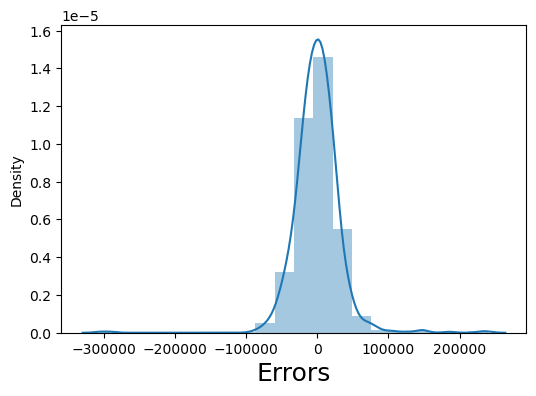

In [143]:
# Plotting the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (6,4))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

#####   Checking Homoscedasticity for error terms

In [144]:
# Residual analysis
y_res = (y_train - y_train_pred)
y_res

318    -89639.459736
239    -39608.967170
986    -45911.330631
1416   -23000.477740
390     -5041.699238
            ...     
802      4389.458247
53      83886.782990
350     14361.832414
79      11244.799801
792    -25423.470463
Length: 1021, dtype: float64

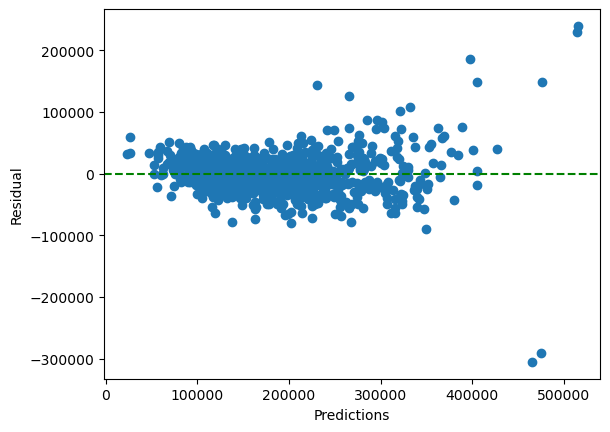

In [145]:

plt.scatter( y_train_pred , y_res) #predicted price vs residual
plt.axhline(y=0, color='g', linestyle='--')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


#### Observations from above graph : 
    - There is not any pattern in the variability of the residuals across the range of predicted values.

### Evaluate R2 of Train model

In [146]:
#Evaluate  R2 model
r2 = r2_score(y_true = y_train,y_pred = y_train_pred)
round(r2,2)

0.83

In [147]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1086189850877.446
1063849021.4274691
32616.698505941233


## Prediction and Evalution on Test Data ...

In [148]:
#Scaling the test Set.. #Note - only transform the test set
df_test[num_vars] = standard_scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.607084,0.665348,...,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.607084,-1.226909,...,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.607084,-1.226909,...,0,1,0,0,0,0,0,0,0,0
382,0.427132,-0.120835,0.648310,-0.532073,1.020432,-0.558025,1.051361,0.577925,1.226741,-1.226909,...,0,1,0,0,0,0,0,0,1,0
1170,0.291260,-0.059203,-0.066511,0.384025,-0.387685,-0.558025,-0.699764,-0.533302,1.226741,0.665348,...,0,1,0,0,0,0,0,0,0,0


In [149]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.097456,-0.074960,...,0.002278,0.610478,0.015945,0.052392,0.004556,0.255125,0.054670,0.054670,0.314351,0.398633
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.923569,0.988361,...,0.047727,0.488198,0.125407,0.223070,0.067420,0.436429,0.227594,0.227594,0.464786,0.490176
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-1.523996,-1.699973,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.607084,-1.226909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.607084,0.192284,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.309828,1.138412,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.143653,1.138412,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
#Create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [151]:
# Final columns of the trained model
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'MSSubClass_120', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'Exterior2nd_Wd Shng',
       'GarageFinish_NA'],
      dtype='object')

In [152]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [153]:
#Running the Linear Model on test data
test_lm = sm.OLS(y_test,X_test_new).fit()

In [154]:
#let's check the summary on test set
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          4.85e-156
Time:                        02:25:33   Log-Likelihood:                -5166.6
No. Observations:                 439   AIC:                         1.038e+04
Df Residuals:                     417   BIC:                         1.047e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.574e+05   5320.018     29.583      0.000    1.47e+05    1.68e+05
OverallQual           2.405e+04   2850.018      8.440      0.000    1.85e+04    2.97e+04
BsmtExposure          9745.2238   1910.765      5.100      0.000    5989.292    1.35e+04
1stFlrSF               2.75e+04   2595.329     10.596      0.000    2.24e+04    3.26e+04
2ndFlrSF              2.822e+04   3729.153      7.567      0.000    2.09e+04    3.55e+04
KitchenQual           1.034e+04   2170.119      4.767      0.000    6079.124    1.46e+04
MSSubClass_120       -2.296e+04   7766.745     -2.956      0.003   -3.82e+04   -7693.967
MSZoning_RL           1.135e+04   4585.570      2.476      0.014    2340.560    2.04e+04
LotShape_IR3          3042.9732   3.24e+04      0.094      0.925   -6.07e+04    6.68e+04
LotConfig_CulDSac     1.507e+04   6444.357      2.338      0.020    2398.699    2.77e+04
Neighborhood_ClearCr -3347.4238   1.21e+04     -0.277      0.782   -2.71e+04    2.04e+04
Neighborhood_Crawfor  1.609e+04   7774.869      2.069      0.039     806.420    3.14e+04
Neighborhood_NoRidge   4.73e+04   1.37e+04      3.448      0.001    2.03e+04    7.43e+04
Neighborhood_NridgHt  7.318e+04   8833.074      8.284      0.000    5.58e+04    9.05e+04
Neighborhood_Somerst  1.688e+04   7700.810      2.192      0.029    1740.994     3.2e+04
Neighborhood_StoneBr  7.647e+04   1.04e+04      7.323      0.000    5.59e+04     9.7e+04
Neighborhood_Veenker  4.075e-12   3.78e-12      1.079      0.281   -3.35e-12    1.15e-11
HouseStyle_1Story     1.791e+04   6115.379      2.928      0.004    5886.052    2.99e+04
HouseStyle_2Story     -434.7149   6234.875     -0.070      0.944   -1.27e+04    1.18e+04
Exterior1st_Stucco    3873.6798   1.46e+04      0.266      0.791   -2.48e+04    3.25e+04
Exterior2nd_CmentBd    1.26e+04   7531.928      1.673      0.095   -2206.061    2.74e+04
Exterior2nd_Wd Shng   1.607e+04   1.34e+04      1.201      0.231   -1.02e+04    4.24e+04
GarageFinish_NA      -1.328e+04   7241.422     -1.834      0.067   -2.75e+04     949.930
==============================================================================
Omnibus:                       78.732   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.615
Skew:                           0.504   Prob(JB):                    5.12e-132
Kurtosis:                       8.660   Cond. No.                     3.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.38e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
# Making predictions on test set with the final model lm (that we created in above steps )
y_pred = lm.predict(X_test_new)

### Calculate r2 score of Test set 

In [156]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.82

### Calculate Adjusted r2 score of Test set 

In [157]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2_value = round(1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),4)
print(adjusted_r2_value)

0.8101


In [158]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

508367135767.98706
1158011698.7881255
34029.57094628325


In [159]:
#Drop the const that we added 
X_test_new = X_test_new.drop(['const'], axis=1)

In [160]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,HouseStyle_1Story,5.28
3,2ndFlrSF,5.04
17,HouseStyle_2Story,4.12
6,MSZoning_RL,3.78
0,OverallQual,2.85
2,1stFlrSF,2.04
4,KitchenQual,1.96
12,Neighborhood_NridgHt,1.48
5,MSSubClass_120,1.39
13,Neighborhood_Somerst,1.33


Text(0, 0.5, 'y_pred')

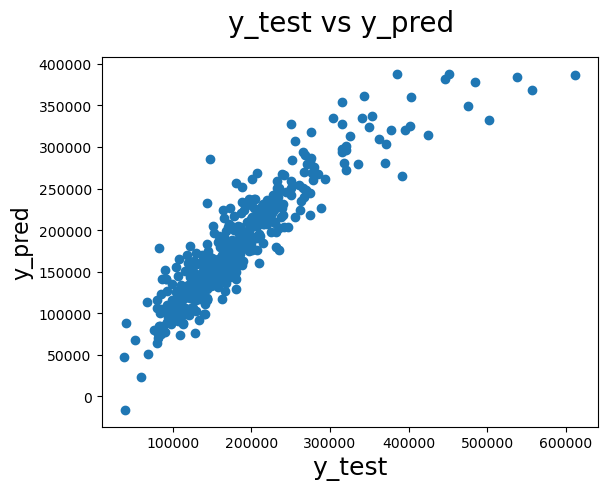

In [161]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test , y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [162]:
#Final housing dataframe .
final_house_df = house_df[['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'MSSubClass_120', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'Exterior2nd_Wd Shng',
       'GarageFinish_NA']]
final_house_df.head()

,OverallQual,BsmtExposure,1stFlrSF,2ndFlrSF,KitchenQual,MSSubClass_120,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_ClearCr,...,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_1Story,HouseStyle_2Story,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,GarageFinish_NA
0,7,1,856,854,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6,4,1262,0,3,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,7,2,920,866,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7,1,961,756,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,8,3,1145,1053,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [163]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8298003331273955
0.8200932112832486
1086189850877.446
508367135767.98706
1063849021.4274691
1158011698.7881255


## Comparison between Train and Test Dataset

<br>


|             | Train Set | Test Set   |
|----------   |-----------|----------  |
|  R^2        |  83.0   |  82      |
|  Adjusted R^2   |  82.6   |  81.06   |


<br>

### Conclusion 
    - Important predictor variables are : 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual',
       'MSSubClass_120', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'Exterior2nd_Wd Shng',
       'GarageFinish_NA'

## Ridge Regression
    - It is a regularization method that adds a penalty term to the ordinary least squares (OLS) objective function to prevent overfitting and improve the model's ability to generalize to new data.
    - Ridge regression is a regularization technique that adds a penalty term to the OLS objective function to control the complexity of the model and prevent overfitting, making it a useful tool for linear regression problems with multicollinearity or when there is a need for improved stability and interpretability of the model.

In [164]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#####  Grid Search Cross-Validation, is a technique used in machine learning for hyperparameter tuning. 
    - Apply GridSearchCV with the defined hyperparameter grid, model, and scoring metric. GridSearchCV will exhaustively search through all possible combinations of hyperparameter values in the grid, train and evaluate the model using cross-validation, and record the performance for each combination of hyperparameter values.

In [165]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [166]:
# Now fit the Ridge model for alpha =10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 25532.70860731  12990.89937553  21604.33546524  28696.44156145
  12189.91802393 -14123.93868106  13382.57064309  -9822.29008963
  13470.69605105   7988.8372807   17815.46743955  44779.41250907
  38680.07530641  20833.83361841  10915.92905115  13363.15778798
  22316.12351711  -4724.1691479  -15525.63556247   8134.76588515
 -13252.29770289  -5791.67459297]


In [167]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new) #predict using Ridge regression model
y_pred_test = ridge.predict(X_test_new)   #predict using Ridge regression model

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train : ' , r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test : ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss_train : ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss_test : ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train :  0.8256466967691506
r2_test :  0.8151103570221739
rss_train :  1112697762082.3381
rss_test :  522447312323.41473
1089811716.0453851
1190084993.9029949


## Lasso Regression 
    - Lasso regression is a linear regression technique used for predicting the values of a dependent variable based on one or more independent variables. It is a regularization method that adds a penalty term to the ordinary least squares (OLS) objective function to prevent overfitting and encourage sparse feature selection, where some of the regression coefficients are exactly equal to zero.

In [168]:
#Instantiate the Lasso object
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### Once GridSearchCV completes, it provides the hyperparameter values that resulted in the best performance based on the chosen scoring metric.

In [169]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [170]:
#Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [171]:
lasso.coef_

array([26461.71747014, 12491.58513411, 22986.06600744, 25132.18755687,
       12541.72279697, -3561.82460842, 11879.99236668,    -0.        ,
        8279.98794887,     0.        ,  3591.36606695, 42104.4532396 ,
       30253.39918569, 13402.33704232,     0.        ,     0.        ,
       17051.46188404,    -0.        ,    -0.        ,     0.        ,
       -1730.37638935,    -0.        ])

In [172]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train : ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test : ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss_train : ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss_test : ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train :  0.8131468304811754
r2_test :  0.8047093384455639
rss_train :  1192470115041.6797
rss_test :  551837731998.9373
1167943305.6235845
1257033558.0841396


In [173]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 'Linear Regression': metric  }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.298003e-01,8.256467e-01,8.131468e-01
1,R2 Score (Test),8.200932e-01,8.151104e-01,8.047093e-01
2,RSS (Train),1.086190e+12,1.112698e+12,1.192470e+12
3,RSS (Test),5.083671e+11,5.224473e+11,5.518377e+11
4,MSE (Train),3.261670e+04,3.301230e+04,3.417519e+04
5,MSE (Test),3.402957e+04,3.449761e+04,3.545467e+04


### Let's observe the changes in the coefficients after regularization

In [174]:
betas = pd.DataFrame(index=X.columns)

In [175]:
betas.rows = X.columns

In [176]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [177]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,23936.632069,25532.708607,26461.717470
BsmtExposure,13313.269137,12990.899376,12491.585134
1stFlrSF,20489.719951,21604.335465,22986.066007
2ndFlrSF,30538.677116,28696.441561,25132.187557
KitchenQual,11258.203469,12189.918024,12541.722797
MSSubClass_120,-20736.498072,-14123.938681,-3561.824608
MSZoning_RL,13386.749463,13382.570643,11879.992367
LotShape_IR3,-16679.111436,-9822.290090,-0.000000
LotConfig_CulDSac,14713.974757,13470.696051,8279.987949
Neighborhood_ClearCr,14266.119528,7988.837281,0.000000


### Subjective Question 1 (Part ) :  What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [178]:
#Initially for Ridge alpha was 10 now set alpha =20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)


[ 26243.44149282  12688.18407356  22259.76710723  27114.85562932
  12755.01173905 -11040.72123175  13018.74671537  -6969.31077144
  12057.69316639   5607.51137663  13070.2506063   35268.11449144
  30759.8230872   16422.44623959   6196.02507757   8302.85218526
  19594.72154786  -2858.50364456 -12075.34968148   6493.51198177
 -10531.9961562   -4916.20539934]


In [179]:
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.8203532909880825
0.8117024883722175


#### Answer : 
    - Coefficients values are increasing as we doubled alpha.
    - r2_score of train data is slightly dropped.

In [180]:
#Initially for Lasso alpha = 500 now set alpha 1000
alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)


[28781.67437927 11335.32624136 24130.47004257 22323.62804636
 13422.01273641    -0.          8791.02835801    -0.
   226.40356422     0.             0.         24248.3114474
 14125.39144974     0.             0.             0.
 10058.08049794     0.            -0.             0.
    -0.            -0.        ]


In [181]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7961651004986473
0.7961379566066087


#### Answer : 
    - Clearly more features are dropped/removed from model when we doubled alpha in lasso
    - r2_score of train data is dropped to ~ 79.6% on train and test data.

###  Subjective Question 3 (Part ) :  After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? 


In [182]:
#Drop the top 5 below features from train data
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Veenker' , '2ndFlrSF','Neighborhood_Somerst'], axis=1)

In [183]:
#Drop same top 5 below features from test data
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Veenker'  , '2ndFlrSF','Neighborhood_Somerst'], axis=1)

In [184]:
#Rebuild lasso regression
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [185]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [186]:
#Re-Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso_lm = Lasso(alpha=alpha)
        
lasso_lm.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [187]:
lasso_lm.coef_

array([34216.37176783,  8785.32736421, 25072.79901241, 13920.75897658,
       -8105.3817922 , 11734.889257  ,    -0.        ,  7458.74281922,
           0.        ,   904.06963504,     0.        , -2052.41262907,
       26721.90913434,    -0.        ,     0.        ,    -0.        ,
          -0.        ])

In [188]:
y_pred_train = lasso_lm.predict(X_train_new)
y_pred_test = lasso_lm.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7547893727863624
0.769053006167182


#### Answer : 
    - After excluding the top 5 features, model r2 score has dropped to 75.4 on train set
    - Also r2 score has dropped to 76.9 on test set 

In [189]:
#To check top 5 columns now ...
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', 'KitchenQual',
       'MSSubClass_120', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'Exterior1st_Stucco',
       'Exterior2nd_CmentBd', 'Exterior2nd_Wd Shng', 'GarageFinish_NA'],
      dtype='object')

#### Top 5 features now :
    - OverallQual , HouseStyle_2Story ,1stFlrSF , KitchenQual , MSZoning_RL